In [2]:
#导入需要的包
import numpy as np
import torch 
from torch import nn
from PIL import Image
import matplotlib.pyplot as plt
import os
from torchvision import datasets, transforms,utils

In [5]:
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize(mean=[0.5],std=[0.5])])
train_data = datasets.MNIST(root = "./data/",
                            transform=transform,
                            train = True,
                            download = True)

test_data = datasets.MNIST(root="./data/",
                           transform = transform,
                           train = False)

In [6]:
len(test_data)

10000

In [7]:
train_loader = torch.utils.data.DataLoader(train_data,batch_size=64,
                                          shuffle=True,num_workers=2)
test_loader = torch.utils.data.DataLoader(test_data,batch_size=64,
                                          shuffle=True,num_workers=2)

In [8]:
print(len(train_loader))
print(len(test_loader))

938
157


In [10]:
# data_iter = iter(train_loader)
print(next(data_iter))

[tensor([[[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]]],


        [[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]]],


        [[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]]],


        ...,


        [[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1.,

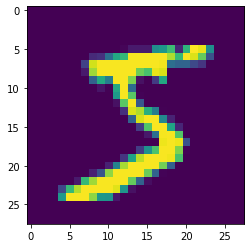

In [12]:
oneimg,label = train_data[0]
oneimg = oneimg.numpy().transpose(1,2,0) 
std = [0.5]
mean = [0.5]
oneimg = oneimg * std + mean
oneimg.resize(28,28)
plt.imshow(oneimg)
plt.show()

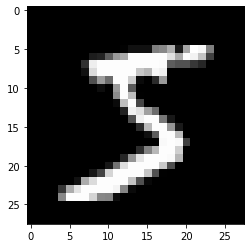

In [13]:
oneimg,label = train_data[0]
grid = utils.make_grid(oneimg)
grid = grid.numpy().transpose(1,2,0) 
std = [0.5]
mean = [0.5]
grid = grid * std + mean
plt.imshow(grid)
plt.show()

tensor(8) tensor(1) tensor(0) tensor(9) tensor(8) tensor(2) tensor(2) tensor(6) 
tensor(4) tensor(3) tensor(6) tensor(7) tensor(9) tensor(1) tensor(3) tensor(7) 
tensor(7) tensor(7) tensor(6) tensor(7) tensor(4) tensor(6) tensor(5) tensor(6) 
tensor(4) tensor(2) tensor(5) tensor(3) tensor(7) tensor(1) tensor(8) tensor(8) 
tensor(5) tensor(4) tensor(5) tensor(9) tensor(5) tensor(6) tensor(5) tensor(1) 
tensor(7) tensor(4) tensor(8) tensor(7) tensor(0) tensor(2) tensor(2) tensor(9) 
tensor(9) tensor(4) tensor(7) tensor(4) tensor(0) tensor(6) tensor(3) tensor(4) 
tensor(1) tensor(4) tensor(1) tensor(6) tensor(0) tensor(4) tensor(8) tensor(7) 


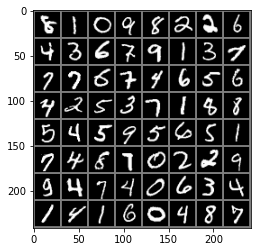

In [17]:
images, lables = next(iter(train_loader))
img = utils.make_grid(images)
# transpose 转置函数(x=0,y=1,z=2),新的x是原来的y轴大小，新的y是原来的z轴大小，新的z是原来的x大小
#相当于把x=1这个一道最后面去。
img = img.numpy().transpose(1,2,0) 
std = [0.5]
mean = [0.5]
img = img * std + mean
for i in range(64):
    print(lables[i], end=" ")
    i += 1
    if i%8 == 0:
        print(end='\n')
plt.imshow(img)
plt.show()

Step2.网络配置
网络结构是两个卷积层，3个全连接层。

Conv2d参数

in_channels(int) – 输入信号的通道数目
out_channels(int) – 卷积产生的通道数目
kerner_size(int or tuple) - 卷积核的尺寸
stride(int or tuple, optional) - 卷积步长
padding(int or tuple, optional) - 输入的每一条边补充0的层数

In [22]:
#1.定义一个CNN网络

import torch.nn.functional as F
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.conv1 = nn.Conv2d(1,32,kernel_size=3,stride=1,padding=1)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(32,64,kernel_size=3,stride=1,padding=1)
        self.fc1 = nn.Linear(64*7*7,1024)#两个池化，所以是7*7而不是14*14
        self.fc2 = nn.Linear(1024,512)
        self.fc3 = nn.Linear(512,10)
#         self.dp = nn.Dropout(p=0.5)
    def forward(self,x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))

        x = x.view(-1, 64 * 7* 7)#将数据平整为一维的 
        x = F.relu(self.fc1(x))
#         x = self.fc3(x)
#         self.dp(x)
        x = F.relu(self.fc2(x))   
        x = self.fc3(x)  
#         x = F.log_softmax(x,dim=1) NLLLoss()才需要，交叉熵不需要
        return x

net = CNN()

In [23]:
# 2.定义损失函数和优化函数
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
#也可以选择Adam优化方法
# optimizer = torch.optim.Adam(net.parameters(),lr=1e-2)

In [25]:
train_accs = []
train_loss = []
test_accs = []
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net = net.to(device)
for epoch in range(3):
    running_loss = 0.0
    for i,data in enumerate(train_loader,0):#0是下标起始位置默认为0
        # data 的格式[[inputs, labels]]       
#         inputs,labels = data
        inputs,labels = data[0].to(device), data[1].to(device)
        #初始为0，清除上个batch的梯度信息
        optimizer.zero_grad()         

        #前向+后向+优化     
        outputs = net(inputs)
        loss = criterion(outputs,labels)
        loss.backward()
        optimizer.step()

        # loss 的输出，每个一百个batch输出，平均的loss
        running_loss += loss.item()
        if i%100 == 99:
            print('[%d,%5d] loss :%.3f' %
                 (epoch+1,i+1,running_loss/100))
            running_loss = 0.0
        train_loss.append(loss.item())

        # 训练曲线的绘制 一个batch中的准确率
        correct = 0
        total = 0
        _, predicted = torch.max(outputs.data, 1)
        total = labels.size(0)# labels 的长度
        correct = (predicted == labels).sum().item() # 预测正确的数目
        train_accs.append(100*correct/total)

[1,  100] loss :0.103
[1,  200] loss :0.113
[1,  300] loss :0.099
[1,  400] loss :0.108
[1,  500] loss :0.096
[1,  600] loss :0.104
[1,  700] loss :0.098
[1,  800] loss :0.091
[1,  900] loss :0.099
[2,  100] loss :0.090
[2,  200] loss :0.080
[2,  300] loss :0.090
[2,  400] loss :0.076
[2,  500] loss :0.078
[2,  600] loss :0.080
[2,  700] loss :0.083
[2,  800] loss :0.074
[2,  900] loss :0.070
[3,  100] loss :0.074
[3,  200] loss :0.066
[3,  300] loss :0.058
[3,  400] loss :0.064
[3,  500] loss :0.062
[3,  600] loss :0.070
[3,  700] loss :0.075
[3,  800] loss :0.062
[3,  900] loss :0.077


第一次省电模式训练
2m 57s
[1,  100] loss :2.288
[1,  200] loss :2.238
[1,  300] loss :2.096
[1,  400] loss :1.543
[1,  500] loss :0.810
[1,  600] loss :0.529
[1,  700] loss :0.428
[1,  800] loss :0.377
[1,  900] loss :0.338
[2,  100] loss :0.312
[2,  200] loss :0.266
[2,  300] loss :0.263
[2,  400] loss :0.234
[2,  500] loss :0.222
[2,  600] loss :0.213
[2,  700] loss :0.215
[2,  800] loss :0.207
[2,  900] loss :0.196
[3,  100] loss :0.160
[3,  200] loss :0.164
[3,  300] loss :0.164
[3,  400] loss :0.153
[3,  500] loss :0.142
[3,  600] loss :0.139
[3,  700] loss :0.121
[3,  800] loss :0.120
[3,  900] loss :0.118

第二次最佳性能训练
executed in 2m 33s, finished 15:10:51 2021-11-01
[1,  100] loss :0.103
[1,  200] loss :0.113
[1,  300] loss :0.099
[1,  400] loss :0.108
[1,  500] loss :0.096
[1,  600] loss :0.104
[1,  700] loss :0.098
[1,  800] loss :0.091
[1,  900] loss :0.099
[2,  100] loss :0.090
[2,  200] loss :0.080
[2,  300] loss :0.090
[2,  400] loss :0.076
[2,  500] loss :0.078
[2,  600] loss :0.080
[2,  700] loss :0.083
[2,  800] loss :0.074
[2,  900] loss :0.070
[3,  100] loss :0.074
[3,  200] loss :0.066
[3,  300] loss :0.058
[3,  400] loss :0.064
[3,  500] loss :0.062
[3,  600] loss :0.070
[3,  700] loss :0.075
[3,  800] loss :0.062
[3,  900] loss :0.077

In [26]:
# 模型的保存

PATH = './mnist_net.pth'
torch.save(net.state_dict(), PATH)

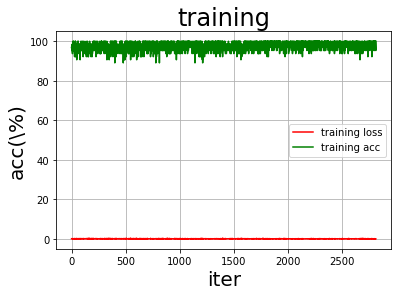

In [28]:
# Step4.模型评估
# 画图

def draw_train_process(title,iters,costs,accs,label_cost,lable_acc):
    plt.title(title, fontsize=24)
    plt.xlabel("iter", fontsize=20)
    plt.ylabel("acc(\%)", fontsize=20)
    plt.plot(iters, costs,color='red',label=label_cost) 
    plt.plot(iters, accs,color='green',label=lable_acc) 
    plt.legend()
    plt.grid()
    plt.show()
train_iters = range(len(train_accs))
draw_train_process('training',train_iters,train_loss,train_accs,'training loss','training acc')

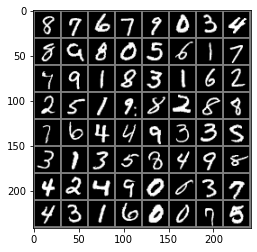

GroundTruth:  8 7 6 7 9 0 3 4 8 9 8 0 5 6 1 7 7 9 1 8 3 1 6 2 2 5 1 9 8 2 8 8 7 6 4 4 9 3 3 5 3 1 3 5 8 4 9 8 4 2 4 9 0 0 3 7 4 3 1 6 0 0 7 5


In [30]:
# 检验一个batch的分类情况

dataiter = iter(test_loader)
images, labels = dataiter.next()

# print images
test_img = utils.make_grid(images)
test_img = test_img.numpy().transpose(1,2,0)
std = [0.5,0.5,0.5]
mean =  [0.5,0.5,0.5]
test_img = test_img*std+0.5
plt.imshow(test_img)
plt.show()
print('GroundTruth: ', ' '.join('%d' % labels[j] for j in range(64)))

In [31]:
test_net = CNN()
test_net.load_state_dict(torch.load(PATH))
test_out = test_net(images)

In [32]:
# 输出的是每一类的对应概率，所以需要选择max来确定最终输出的类别 dim=1 表示选择行的最大索引

_, predicted = torch.max(test_out, dim=1)

print('Predicted: ', ' '.join('%d' % predicted[j]
                              for j in range(64)))

Predicted:  8 7 6 7 9 0 3 4 8 9 8 0 5 6 1 7 7 9 1 8 3 1 6 2 2 5 1 9 8 2 8 8 7 6 4 4 9 3 3 5 3 1 3 5 8 4 9 8 4 2 4 9 0 8 3 7 4 3 1 6 0 0 7 5


In [34]:
# 测试集上面整体的准确率

correct = 0
total = 0
with torch.no_grad():# 进行评测的时候网络不更新梯度
    for data in test_loader:
        images, labels = data
        outputs = test_net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)# labels 的长度
        correct += (predicted == labels).sum().item() # 预测正确的数目

print('Accuracy of the network on the  test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the  test images: 98 %


In [36]:
# 10个类别的准确率

class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = test_net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels)
#         print(predicted == labels)
        for i in range(10):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %d : %2d %%' % (
        i, 100 * class_correct[i] / class_total[i]))

Accuracy of 0 : 100 %
Accuracy of 1 : 99 %
Accuracy of 2 : 99 %
Accuracy of 3 : 98 %
Accuracy of 4 : 100 %
Accuracy of 5 : 97 %
Accuracy of 6 : 97 %
Accuracy of 7 : 98 %
Accuracy of 8 : 94 %
Accuracy of 9 : 97 %
